***
In this notebook i will be demonstarting Latent Dirichlet Allocation(LDA) for topic modelling. I will be using the Amazon fine food reviews dataset from Kaggle(https://www.kaggle.com/snap/amazon-fine-food-reviews) for performing LDA based topic modelling
I will be using the gensim package for LDA topic modelling and pyLDAvis for visualization of LDA topic model
***

In [7]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install spacy

In [4]:
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23


In [6]:
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=e36474a91f3c0149f79278a557cc57840899f0cc22a92d2e8e3713ddd5e52064
  Stored in directory: c:\users\ashish yenkar\appdata\local\pip\cache\wheels\2a\5b\b3\26b52781cdeea9c815e147cfd4ac4a0a3472bce92142115670
Successfully built pyLDAvis


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ASHISH YENKAR\anaconda3\python.exe' 'C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\ASHISH YENKAR\AppData\Local\Temp\pip-build-env-9z7eu823\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools
       cwd: None
  Complete output (28 lines):
  Traceback (most recent call last):
    File "C:\Users\ASHISH YENKAR\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ASHISH YENKAR\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\pip\__main__.py", line 24, in <module>
      sys.exit(_main())
    File "C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\pip\_internal\cli\main.py", line 71, in main
      command = create_command(cmd_name, iso

In [16]:
df= pd.read_csv("C:/Users/ASHISH YENKAR/Desktop/Topic-Modeling-main/data.csv")

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
print(df.head(2))
print(len(df))

                                           Statement  \
0  “Nobody's ever seen a number like this… (33.1%...   
1  Says President Donald Trump "thinks that $15 a...   

                                                Link           Date  \
0  https://www.politifact.com/factchecks/2020/oct...  ober 30^ 2020   
1  https://www.politifact.com/factchecks/2020/oct...  ober 30^ 2020   

         Source      Label  
0  Donald Trump  half-true  
1     Joe Biden  half-true  
31


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
import nltk
nltk.download('stopwords') # run this one time

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     YENKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

***
Let us pre-process the data
***

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['Statement']=df['Statement'].apply(remove_stopwords)



C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
import spacy


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
!python -m spacy download en_core_web_sm

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [40]:

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
 
text_list=df['Statement'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Says President Donald Trump "thinks $15 hour minimum wage much essential workers."
['hour', 'minimum', 'wage', 'much', 'essential', 'worker']


***
Create vocabulary dictionary and document term matrix
***

In [43]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
lda_model.print_topics()

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.057*"state" + 0.057*"%" + 0.057*"act^" + 0.057*"affordable" + 0.057*"folk" + 0.057*"staff" + 0.057*"camera" + 0.057*"court" + 0.005*"personal" + 0.005*"flexible"'),
 (1,
  '0.047*"time" + 0.047*"pre" + 0.047*"condition" + 0.047*"-" + 0.047*"taxis" + 0.047*"inheritance" + 0.047*"basis" + 0.047*"meeting" + 0.047*"voter" + 0.047*"pandemic"'),
 (2,
  '0.050*"test" + 0.050*"year" + 0.050*"drug" + 0.050*"people" + 0.050*"alcohol" + 0.050*"dependent" + 0.050*"low" + 0.050*"building" + 0.050*"school" + 0.050*"campaign"'),
 (3,
  '0.060*"health" + 0.060*"family" + 0.060*"theft" + 0.060*"other" + 0.060*"insurance^" + 0.060*"trump" + 0.060*"free" + 0.005*"earnings^" + 0.005*"flexible" + 0.005*"care"'),
 (4,
  '0.077*"looter" + 0.077*"hungry" + 0.077*"kid" + 0.007*"earnings^" + 0.007*"folk" + 0.007*"care" + 0.007*"driver" + 0.007*"act^" + 0.007*"protections^" + 0.007*"schedule"'),
 (5,
  '0.073*"ballot" + 0.026*"week" + 0.026*"flexible" + 0.026*"schedule" + 0.026*"protections^" + 0.026*"

In [46]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.180588 -0.076838       1        1  26.979632
5     -0.151685 -0.119760       2        1  21.501939
9     -0.002677  0.118472       3        1   8.923225
2     -0.030574  0.076248       4        1   8.329797
1      0.059281 -0.018118       5        1   8.304550
8     -0.057538  0.006982       6        1   7.647974
0      0.002431  0.006705       7        1   6.637886
3     -0.011360  0.012258       8        1   6.416921
4      0.005148  0.003810       9        1   3.481310
7      0.006386 -0.009760      10        1   1.776766, topic_info=         Term     Freq     Total Category  logprob  loglift
33     voting  1.00000  1.000000  Default  30.0000  30.0000
29     ballot  2.00000  2.000000  Default  29.0000  29.0000
15       test  1.00000  1.000000  Default  28.0000  28.0000
47     hungry  0.00000  0.000000  Default  27.0000  27.0000
49     looter  0.00000  0.000000  Default  26.0000  26.0000
..        ...      ...       ...      ...      ...      ...
22  qualified  0.02094  1.153705  Topic10  -4.7185   0.0213
23      state  0.02094  1.610056  Topic10  -4.7185  -0.3120
24       year  0.02094  1.648988  Topic10  -4.7185  -0.3359
25   majority  0.02094  1.190557  Topic10  -4.7185  -0.0101
26     mother  0.02094  1.190557  Topic10  -4.7185  -0.0101

[486 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.607198       %
0         7  0.607198       %
42        1  0.601303       -
42        5  0.601303       -
71        7  1.066681    act^
...     ...       ...     ...
38        1  0.536732    week
38        2  0.536732    week
12        1  0.526319  worker
24        2  0.606433    year
24        4  0.606433    year

[123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 10, 3, 2, 9, 1, 4, 5, 8])

In [47]:

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -4.578825071234323

Coherence Score:  0.4981899095338174


***
Method to find optimal number of topics
Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore
***

In [48]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


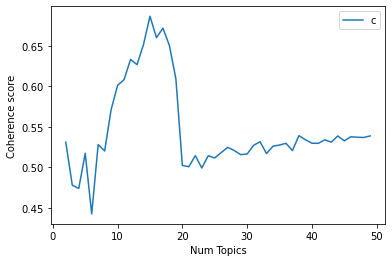

In [50]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores


In [51]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.531
Num Topics = 3  has Coherence Value of 0.4779
Num Topics = 4  has Coherence Value of 0.4738
Num Topics = 5  has Coherence Value of 0.5172
Num Topics = 6  has Coherence Value of 0.4424
Num Topics = 7  has Coherence Value of 0.528
Num Topics = 8  has Coherence Value of 0.5201
Num Topics = 9  has Coherence Value of 0.5711
Num Topics = 10  has Coherence Value of 0.6011
Num Topics = 11  has Coherence Value of 0.6082
Num Topics = 12  has Coherence Value of 0.633
Num Topics = 13  has Coherence Value of 0.6266
Num Topics = 14  has Coherence Value of 0.6515
Num Topics = 15  has Coherence Value of 0.6863
Num Topics = 16  has Coherence Value of 0.6599
Num Topics = 17  has Coherence Value of 0.6716
Num Topics = 18  has Coherence Value of 0.6502
Num Topics = 19  has Coherence Value of 0.6092
Num Topics = 20  has Coherence Value of 0.5022
Num Topics = 21  has Coherence Value of 0.5007
Num Topics = 22  has Coherence Value of 0.5143
Num Topics = 23  has Coh

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.044*"state" + 0.044*"%" + 0.044*"act^" + 0.044*"affordable" + 0.044*"dependent" + 0.044*"people" + 0.044*"drug" + 0.044*"folk" + 0.044*"alcohol" + 0.044*"laptop"'),
 (1,
  '0.054*"week" + 0.054*"year" + 0.028*"great" + 0.028*"%" + 0.028*"growth" + 0.028*"time" + 0.028*"election" + 0.028*"expert" + 0.028*"law" + 0.028*"economic"'),
 (2,
  '0.045*"incompetent^" + 0.045*"lying^" + 0.045*"double" + 0.045*"insincere^" + 0.045*"flip" + 0.045*"talking^" + 0.045*"socialist" + 0.045*"flopping^" + 0.045*"radical" + 0.045*"taxis"'),
 (3,
  '0.068*"do" + 0.068*"chump" + 0.068*"voter" + 0.068*"debt" + 0.007*"interview" + 0.007*"ballot" + 0.007*"test" + 0.007*"important" + 0.007*"pandemic" + 0.007*"voting"'),
 (4,
  '0.064*"ballot" + 0.064*"major" + 0.064*"right" + 0.064*"voting" + 0.064*"decision" + 0.006*"interview" + 0.006*"debt" + 0.006*"test" + 0.006*"meeting" + 0.006*"time"'),
 (5,
  '0.057*"time" + 0.057*"pre" + 0.057*"-" + 0.057*"staff" + 0.057*"condition" + 0.057*"camera" + 0.057*

In [53]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.197857 -0.016457       1        1  21.204797
1     -0.067403  0.149429       2        1  18.798562
6     -0.097953 -0.136986       3        1  15.213728
8      0.003145  0.031114       4        1  10.164430
2     -0.000102 -0.022507       5        1   9.815087
0     -0.023184  0.043363       6        1   9.575206
5     -0.026839 -0.033531       7        1   6.102991
4      0.005355 -0.012388       8        1   5.130815
3      0.009123 -0.002038       9        1   3.994383, topic_info=          Term      Freq     Total Category  logprob  loglift
29      ballot  2.000000  2.000000  Default   30.000  30.0000
6         time  2.000000  2.000000  Default   29.000  29.0000
33      voting  1.000000  1.000000  Default   28.000  28.0000
44         pre  1.000000  1.000000  Default   27.000  27.0000
42           -  1.000000  1.000000  Default   26.000  26.0000
..         ...       ...       ...      ...      ...      ...
43   condition  0.035634  1.540985   Topic9   -4.997  -0.5466
11        wage  0.035633  1.796306   Topic9   -4.997  -0.6999
42           -  0.035633  1.540976   Topic9   -4.997  -0.5466
38        week  0.035633  1.765939   Topic9   -4.997  -0.6829
102  signature  0.035633  1.126667   Topic9   -4.997  -0.2335

[404 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         2  0.612148           %
0         6  0.612148           %
42        3  0.648939           -
71        6  0.995537        act^
72        6  0.995537  affordable
...     ...       ...         ...
33        1  0.649258      voting
11        1  0.556698        wage
38        2  0.566271        week
12        1  0.556689      worker
24        2  0.566277        year

[110 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 7, 9, 3, 1, 6, 5, 4])